In [1]:
%sh
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-02.csv
wget https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-03.csv

mv yellow_tripdata_2018* /dbfs/FileStore/tables

--2019-06-16 23:05:58-- https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2018-01.csv
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.185.46
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.185.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 772098307 (736M) [text/csv]
Saving to: ‘yellow_tripdata_2018-01.csv’

 0K .......... .......... .......... .......... .......... 0% 619K 20m18s
 50K .......... .......... .......... .......... .......... 0% 622K 20m15s
 100K .......... .......... .......... .......... .......... 0% 625K 20m12s
 150K .......... .......... .......... .......... .......... 0% 52.7M 15m12s
 200K .......... .......... .......... .......... .......... 0% 105M 12m11s
 250K .......... .......... .......... .......... .......... 0% 631K 13m28s
 300K .......... .......... .......... .......... .......... 0% 84.2M 11m34s
 350K .......... .......... .......... .......... .......... 0% 78.3M 10m9s
 400K .......... .......... .......... .......... .......... 0% 91.5M 9m2s
 450K .......... .......... .......... .......... .......... 0% 189M 8m8s
 500K .......... .......... .......... .......... .......... 0% 648K 9m9s
 550K .......... .......... .......... .......... .......... 0% 80.3M 8m24s
 600K .......... .......... .......... .......... .......... 0% 75.7M 7m46s
 650K .......... .......... .......... .......... .......... 0% 77.1M 7m14s
 700K .......... .......... .......... .......... .......... 0% 80.0M 6m45s
 750K .......... .......... .......... .......... .......... 0% 74.1M 6m20s
 800K .......... .......... .......... .......... .......... 0% 83.9M 5m59s
 850K .......... .......... .......... .......... .......... 0% 163M 5m39s
 900K .......... .......... .......... .......... .......... 0% 180M 5m21s
 950K .......... .......... .......... .......... .......... 0% 108M 5m6s
 1000K .......... .......... .......... .......... .......... 0% 105M 4m51s
 1050K .......... .......... .......... .......... .......... 0% 98.9M 4m38s
 1100K .......... .......... .......... .......... .......... 0% 669K 5m15s
 1150K .......... .......... .......... .......... .......... 0% 50.8M 5m3s
 1200K .......... .......... .......... .......... .......... 0% 49.3M 4m51s
 1250K .......... .......... .......... .......... .......... 0% 49.5M 4m40s
 1300K .......... .......... .......... .......... .......... 0% 58.5M 4m31s
 1350K .......... .......... .......... .......... .......... 0% 68.5M 4m21s
 1400K .......... .......... .......... .......... .......... 0% 97.7M 4m12s
 1450K .......... .......... .......... .......... .......... 0% 166M 4m4s
 1500K .......... .......... .......... .......... .......... 0% 165M 3m56s
 1550K .......... .......... .......... .......... .......... 0% 160M 3m49s
 1600K .......... .......... .......... .......... .......... 0% 168M 3m42s
 1650K .......... .......... .......... .......... .......... 0% 171M 3m36s
 1700K .......... .......... .......... .......... .......... 0% 184M 3m30s
 1750K .......... .......... .......... .......... .......... 0% 188M 3m24s
 1800K .......... .......... .......... .......... .......... 0% 164M 3m19s
 1850K .......... .......... .......... .......... .......... 0% 167M 3m14s
 1900K .......... .......... .......... .......... .......... 0% 154M 3m9s
 1950K .......... .......... .......... .......... .......... 0% 160M 3m4s
 2000K .......... .......... .......... .......... .......... 0% 176M 3m0s
 2050K .......... .......... .......... .......... .......... 0% 1.70M 3m6s
 2100K .......... .......... .......... .......... .......... 0% 1.14M 3m16s
 2150K .......... .......... .......... .......... .......... 0% 195M 3m12s
 2200K .......... .......... .......... .......... .......... 0% 184M 3m8s
 2250K .......... .......... .......... .......... .......... 0% 204M 3m4s
 2300K .......... .......... .......... .......... .......... 0% 195M 3m0s
 2350K .......... .......... .......... .......... .......... 0% 200M 2m

We just downloaded New York City's yellow cab ride data for January, February and March 2018. Now, let's get it into a data frame.

WE do not infer thhe schema here, as it takes a lot of time

In [3]:
filepath = "/FileStore/tables/yellow_tripdata_*"

# Create data frame
cabrideraw = spark.read.option("header", True).csv(filepath)
#cabridedata = spark.read.format('csv').option("inferSchema", True).option("header", True).option("sep", ',').load(filepath)

# Display top 5 rows
cabrideraw.show(5)

+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
 1| 2018-01-01 00:21:05| 2018-01-01 00:24:23| 1| .50| 1| N| 41| 24| 2| 4.5| 0.5| 0.5| 0| 0| 0.3| 5.8|
 1| 2018-01-01 00:44:55| 2018-01-01 01:03:05| 1| 2.70| 1| N| 239| 140| 2| 14| 0.5| 0.5| 0| 0| 0.3| 15.3|
 1| 2018-01-01 00:08:26| 2018-01-01 00:14:21| 2| .80| 1| N| 262| 141| 1| 6| 0.5| 0.5| 1| 0| 0.3| 8.3|
 1| 2018-01-01 00:20:22| 2018-01-01 00:52:51| 1| 10.20| 1| N| 140| 257| 2| 33.5| 0.5| 0.5| 0| 0| 0.3| 34.8|
 1| 2018-01-01 00:09:18| 2018-01-01 00:27:06| 2| 2.50| 1| N| 246| 239| 1| 12.5| 0.5| 0.5| 2.75| 0| 0.3| 16.55|
+--------+--------------------+---------------------+---------------+-------------+----------+------------------+------------+------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
only showing top 5 rows

In [4]:
# Print row count
print( cabrideraw.count() )

53925735

Transform the data types to have the correct schema. Transforming it like below is much faster than inferSchema = True

In [6]:
# Data conversions. if conversion does nopt apply, it will return null, so check for nulls later
cabridetyped = cabrideraw.withColumn('VendorID_tmp', cabrideraw.VendorID.cast('integer')).drop('VendorID').withColumnRenamed('VendorID_tmp', 'VendorID') \
                          .withColumn('tp_pkp_dt_tmp', cabrideraw.tpep_pickup_datetime.cast('date')).withColumnRenamed('tp_pkp_dt_tmp', 'tpep_pickup_date') \
                          .withColumn('tp_pkp_dtm_tmp', cabrideraw.tpep_pickup_datetime.cast('timestamp')).drop('tpep_pickup_datetime').withColumnRenamed('tp_pkp_dtm_tmp', 'tpep_pickup_datetime') \
                          .withColumn('tp_dp_dt_tmp', cabrideraw.tpep_dropoff_datetime.cast('timestamp')).drop('tpep_dropoff_datetime').withColumnRenamed('tp_dp_dt_tmp', 'tpep_dropoff_datetime') \
                          .withColumn('passenger_count_tmp', cabrideraw.passenger_count.cast('double')).drop('passenger_count').withColumnRenamed('passenger_count_tmp', 'passenger_count') \
                          .withColumn('trip_distance_tmp', cabrideraw.trip_distance.cast('double')).drop('trip_distance').withColumnRenamed('trip_distance_tmp', 'trip_distance') \
                          .withColumn('fare_amount_tmp', cabrideraw.fare_amount.cast('double')).drop('fare_amount').withColumnRenamed('fare_amount_tmp', 'fare_amount') \
                          .withColumn('extra_tmp', cabrideraw.extra.cast('double')).drop('extra').withColumnRenamed('extra_tmp', 'extra') \
                          .withColumn('mta_tax_tmp', cabrideraw.mta_tax.cast('double')).drop('mta_tax').withColumnRenamed('mta_tax_tmp', 'mta_tax') \
                          .withColumn('tip_amount_tmp', cabrideraw.tip_amount.cast('double')).drop('tip_amount').withColumnRenamed('tip_amount_tmp', 'tip_amount') \
                          .withColumn('tolls_amount_tmp', cabrideraw.tolls_amount.cast('double')).drop('tolls_amount').withColumnRenamed('tolls_amount_tmp', 'tolls_amount') \
                          .withColumn('impr_srcg_tmp', cabrideraw.improvement_surcharge.cast('double')).drop('improvement_surcharge').withColumnRenamed('impr_srcg_tmp', 'improvement_surcharge') \
                          .withColumn('total_amount_tmp', cabrideraw.total_amount.cast('double')).drop('total_amount').withColumnRenamed('total_amount_tmp', 'total_amount') 
                          

# Display top 5 rows for sanity check
cabridetyped.show(5)

# Print schema
cabridetyped.printSchema()

+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+
RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|VendorID|tpep_pickup_date|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+
 1| N| 41| 24| 2| 1| 2018-01-01| 2018-01-01 00:21:05| 2018-01-01 00:24:23| 1.0| 0.5| 4.5| 0.5| 0.5| 0.0| 0.0| 0.3| 5.8|
 1| N| 239| 140| 2| 1| 2018-01-01| 2018-01-01 00:44:55| 2018-01-01 01:03:05| 1.0| 2.7| 14.0| 0.5| 0.5| 0.0| 0.0| 0.3| 15.3|
 1| N| 262| 141| 1| 1| 2018-01-01| 2018-01-01 00:08:26| 2018-01-01 00:14:21| 2.0| 0.8| 6.0| 0.5| 0.5| 1.0| 0.0| 0.3| 8.3|
 1| N| 140| 257| 2| 1| 2018-01-01| 2018-01-01 00:20:22| 2018-01-01 00:52:51| 1.0| 10.2| 33.5| 0.5| 0.5| 0.0| 0.0| 0.3| 34.8|
 1| N| 246| 239| 1| 1| 2018-01-01| 2018-01-01 00:09:18| 2018-01-01 00:27:06| 2.0| 2.5| 12.5| 0.5| 0.5| 2.75| 0.0| 0.3| 16.55|
+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+
only showing top 5 rows

root
-- RatecodeID: string (nullable = true)
-- store_and_fwd_flag: string (nullable = true)
-- PULocationID: string (nullable = true)
-- DOLocationID: string (nullable = true)
-- payment_type: string (nullable = true)
-- VendorID: integer (nullable = true)
-- tpep_pickup_date: date (nullable = true)
-- tpep_pickup_datetime: timestamp (nullable = true)
-- tpep_dropoff_datetime: timestamp (nullable = true)
-- passenger_count: double (nullable = true)
-- trip_distance: double (nullable = true)
-- fare_amount: double (nullable = true)
-- extra: double (nullable = true)
-- mta_tax: double (nullable = true)
-- tip_amount: double (nullable = true)
-- tolls_amount: double (nullable = true)
-- improvement_surcharge: double (nullable = true)
-- total_amount: double (nullable = true)

Calculate trip duration

In [8]:
from pyspark.sql import functions as F

timeFmt = "yyyy-MM-dd'T'HH:mm:ss.SSS"
timeDiff = (F.unix_timestamp('tpep_dropoff_datetime', format=timeFmt) - F.unix_timestamp('tpep_pickup_datetime', format=timeFmt))

cabridetyped = cabridetyped.withColumn('trip_duration_seconds', timeDiff)

In [9]:
display( cabridetyped )

RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,VendorID,tpep_pickup_date,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_duration_seconds
1,N,41,24,2,1,2018-01-01,2018-01-01T00:21:05.000+0000,2018-01-01T00:24:23.000+0000,1.0,0.5,4.5,0.5,0.5,0.0,0.0,0.3,5.8,198
1,N,239,140,2,1,2018-01-01,2018-01-01T00:44:55.000+0000,2018-01-01T01:03:05.000+0000,1.0,2.7,14.0,0.5,0.5,0.0,0.0,0.3,15.3,1090
1,N,262,141,1,1,2018-01-01,2018-01-01T00:08:26.000+0000,2018-01-01T00:14:21.000+0000,2.0,0.8,6.0,0.5,0.5,1.0,0.0,0.3,8.3,355
1,N,140,257,2,1,2018-01-01,2018-01-01T00:20:22.000+0000,2018-01-01T00:52:51.000+0000,1.0,10.2,33.5,0.5,0.5,0.0,0.0,0.3,34.8,1949
1,N,246,239,1,1,2018-01-01,2018-01-01T00:09:18.000+0000,2018-01-01T00:27:06.000+0000,2.0,2.5,12.5,0.5,0.5,2.75,0.0,0.3,16.55,1068
1,N,143,143,2,1,2018-01-01,2018-01-01T00:29:29.000+0000,2018-01-01T00:32:48.000+0000,3.0,0.5,4.5,0.5,0.5,0.0,0.0,0.3,5.8,199
1,N,50,239,1,1,2018-01-01,2018-01-01T00:38:08.000+0000,2018-01-01T00:48:24.000+0000,2.0,1.7,9.0,0.5,0.5,2.05,0.0,0.3,12.35,616
1,N,239,238,1,1,2018-01-01,2018-01-01T00:49:29.000+0000,2018-01-01T00:51:53.000+0000,1.0,0.7,4.0,0.5,0.5,1.0,0.0,0.3,6.3,144
1,N,238,24,1,1,2018-01-01,2018-01-01T00:56:38.000+0000,2018-01-01T01:01:05.000+0000,1.0,1.0,5.5,0.5,0.5,1.7,0.0,0.3,8.5,267
1,N,170,170,2,1,2018-01-01,2018-01-01T00:17:04.000+0000,2018-01-01T00:22:24.000+0000,1.0,0.7,5.5,0.5,0.5,0.0,0.0,0.3,6.8,320


Calculate and display summary statistics.

In [11]:
summarystat = cabridetyped.describe()
summarystat.show(truncate = False) # Show all rows

+-------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+------------------+---------------------+------------------+---------------------+
summary|RatecodeID |store_and_fwd_flag|PULocationID |DOLocationID |payment_type |VendorID |passenger_count |trip_distance |fare_amount |extra |mta_tax |tip_amount |tolls_amount |improvement_surcharge|total_amount |trip_duration_seconds|
+-------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+------------------+---------------------+------------------+---------------------+
count |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |53925735 |
mean |1.0423393394638014 |null |163.34657181770447|161.65197911535188|1.3114834503414743 |1.5663932628827404 |1.599869246102997 |2.900861137822174|12.79901461667615|0.332028310972488 |0.4973488982579468 |1.8668352034517575|0.3351571167276099|0.2996641473609889 |16.133557454919732|992.0595086372026 |
stddev |0.46300072083475546|null |66.53285569238852 |70.37358978652095 |0.48335700412037863|0.49582238320261357|1.2481362292399358|26.07412490038028|70.82679503435747|0.4620315798273775|0.049062740268221314|2.5703925749943353|1.7983915152987222|0.5449124955759587 |71.33111336618464 |87315.09491313029 |
min |1 |N |1 |1 |1 |1 |0.0 |0.0 |-485.0 |-60.0 |-0.5 |-322.42 |-52.5 |-0.3 |-485.8 |-640176592 |
max |99 |Y |98 |99 |4 |4 |192.0 |189483.84 |349026.72 |96.64 |150.0 |496.0 |1650.0 |4000.3 |349116.78 |531167 |
+-------+-------------------+------------------+------------------+------------------+-------------------+-------------------+------------------+-----------------+-----------------+------------------+--------------------+------------------+------------------+---------------------+------------------+---------------------+

Check for nulls and missing values.

In [13]:
from pyspark.sql.functions import isnan, isnull, when, count, col

cabridetyped.select([count(when(isnull(c), c)).alias(c) for c in cabridetyped.columns]).show()

+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+---------------------+
RatecodeID|store_and_fwd_flag|PULocationID|DOLocationID|payment_type|VendorID|tpep_pickup_date|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|trip_duration_seconds|
+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+---------------------+
 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0| 0|
+----------+------------------+------------+------------+------------+--------+----------------+--------------------+---------------------+---------------+-------------+-----------+-----+-------+----------+------------+---------------------+------------+---------------------+

Check for invalid values (out of time records, or invalid passenger counts, negative trip duration)

In [15]:
cabridetyped.filter(cabridetyped.tpep_pickup_datetime < '2018-01-01').count()

Out[ 10 ]: 696

In [16]:
cabridetyped.filter(cabridetyped.tpep_pickup_datetime >= '2018-04-01').count()

Out[ 11 ]: 27243050

In [17]:
cabridetyped.filter(cabridetyped.passenger_count < 1).count()

Out[ 12 ]: 402117

In [18]:
cabridetyped.filter(cabridetyped.passenger_count >= 10).count()

Out[ 13 ]: 1

In [19]:
cabridetyped.filter(cabridetyped.trip_duration_seconds < 1).count()

Out[ 14 ]: 45050

In [20]:
# More than 5 hours
cabridetyped.filter(cabridetyped.trip_duration_seconds > 18000).count()

Out[ 15 ]: 109568

In [21]:
# Negative distance
cabridetyped.filter(cabridetyped.trip_distance < 0).count()

Out[ 16 ]: 0

In [22]:
cabridetyped.filter(cabridetyped.fare_amount <= 0).count()

Out[ 17 ]: 44223

In [23]:
# Use Filtered Data
cabridefiltered = cabridetyped.filter(cabridetyped.tpep_pickup_datetime > '2017-12-31').filter(cabridetyped.tpep_pickup_datetime < '2018-04-01') \
          .filter(cabridetyped.passenger_count > 0).filter(cabridetyped.passenger_count < 10) \
          .filter(cabridetyped.trip_duration_seconds > 0).filter(cabridetyped.trip_duration_seconds <= 18000) \
          .filter(cabridetyped.trip_distance > 0).filter(cabridetyped.fare_amount > 0)

Data Summarization

In [25]:
from pyspark.sql.functions import avg

In [26]:
# Average distance by vendor ID
display(cabridefiltered.select('VendorID', 'trip_distance').groupBy('VendorID').agg(avg('trip_distance')))

VendorID,avg(trip_distance)
1,2.715763265510893
2,2.9195288417638534


Investigating further outliers

In [28]:
import matplotlib.pyplot as plt

Reusable function to plot histogtams

In [30]:
def plot_histogram(vector, bins, xlim):
  x = vector
  num_bins = bins
  
  fig, ax = plt.subplots()
  n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
  ax.set_xlim(0,xlim)
  display(fig)

Plot histogtams - trip duration

In [32]:
x = cabridefiltered.select('trip_duration_seconds').rdd.flatMap(lambda x: x).collect()

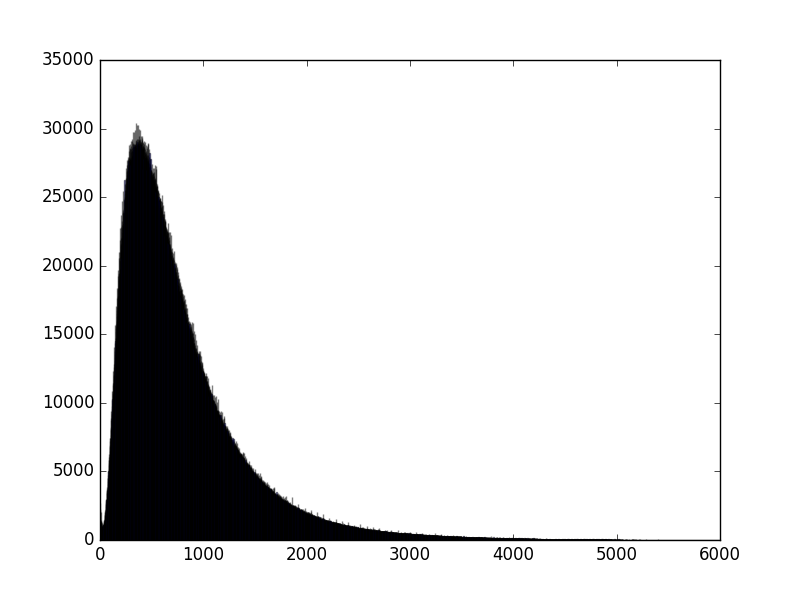

In [33]:
plot_histogram(x, 50000, 6000)

Plot histogtams - trip distance

In [35]:
x = cabridefiltered.select('trip_distance').rdd.flatMap(lambda x: x).collect()

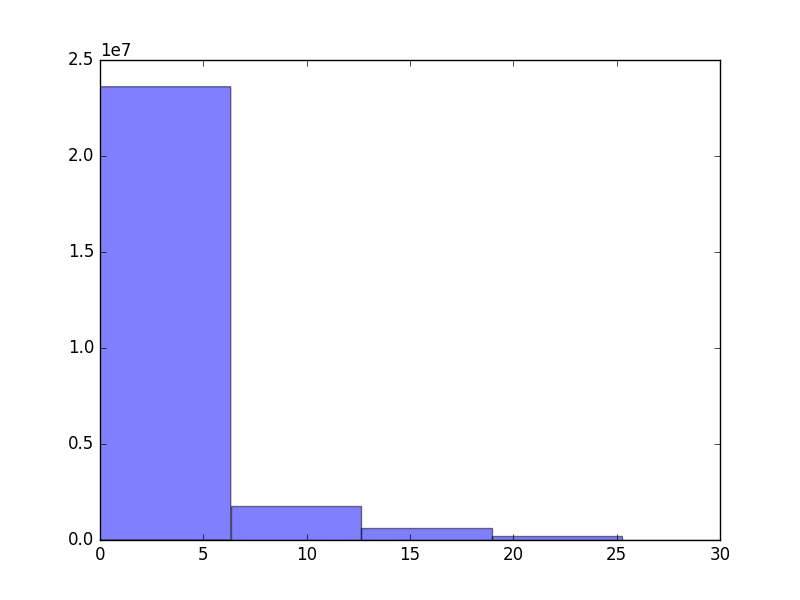

In [36]:
plot_histogram(x, 30000, 30)